# Results and Conclusion

<hr style="height:2pt">

## Summary

## Results 

We used different modeling methods for the 5-genres classification problem, using the variables from EDA part.

**Variables:**

'duration_ms', 'time_signature', 'key', 'tempo', 'energy', 'mode', 'loudness', 'speechiness', 'danceability', 'acousticness', 'instrumentalness', 'valence', 'liveness', 'artist_followers'
 
**Models**  
     Logistic regression with cross validation
     Polynomial logistic regression with cross validation
     LDA
     QDA
     Simple Decision tree
     Random Forest
     AdaBoost


**Performance**

    Performance box plot
    performace stats
    selected model
    Overfitting:
        - Regularization

  


In [2]:
from IPython.display import Image

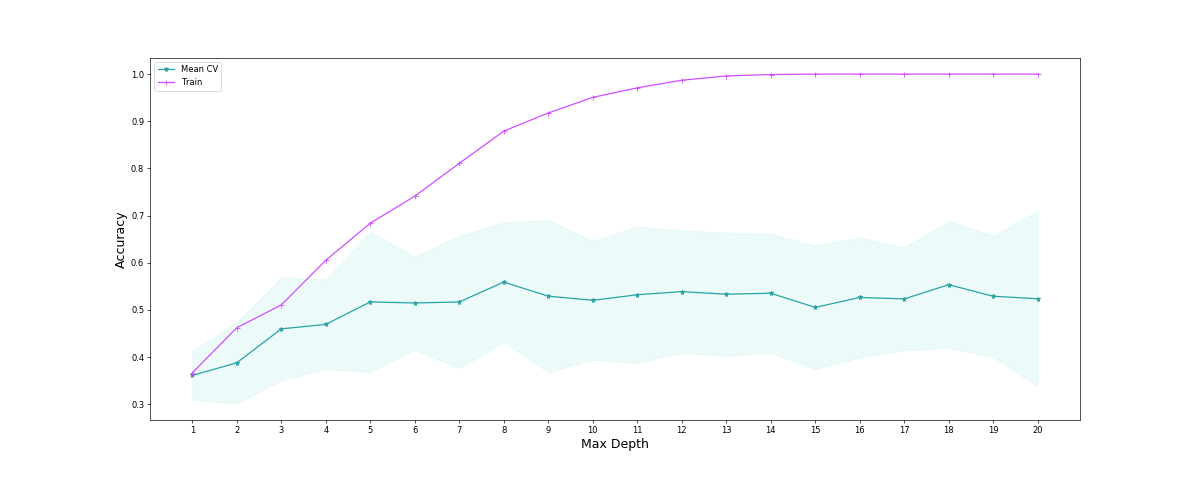

In [5]:
Image("img/trees_perf.png",width=1000, height=600)

## Conclusion

Hi Yalda & Joao!